In [1]:
import keras
import numpy as np
import pandas as pd
import tensorflow as tf
import os
from sklearn.linear_model import LinearRegression
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, Input
import h5py
from sklearn.metrics import r2_score

In [2]:
os.chdir('/content/drive/My Drive/github/NNanobody/')

In [3]:
def load_all_models():
  model_list = {}
  for dataset in ['Full Regression','Hold out Regression','Hold out Top 4%']:
    for loaded_model in ['seq_32x1_16', 'seq_64x1_16','seq_32x2_16','seq_32_32','seq_32x1_16_filt3','seq_emb_32x1_16']:
      model = keras.models.load_model(f'./weights/regression/{dataset}/{loaded_model}')
      model_list[dataset + ' ' + loaded_model] = model

  for loaded_model in ['seq_32x1_16', 'seq_64x1_16','seq_32x2_16','seq_32_32','seq_32x1_16_filt3','seq_emb_32x1_16']:
    class_model = keras.models.load_model(f'./weights/classification/Full Classification/loaded_model')
    model_list['Full Classification' + ' ' + loaded_model] = class_model

  return model_list

In [4]:
fi = h5py.File('./data/regression/Test set Regression/test.h5.batch1', 'r')
test_set = np.asarray(fi['data'])
test_label = np.asarray(fi['label'])

In [7]:
def get_stacked_prediction():
  models = load_all_models()
  output = []
  for idx, model in enumerate(models.values()):
    cur_pred = model.predict(test_set).flatten()
    output.append([])
    output[idx].append(cur_pred)
  
  output = np.array(output)
  return output.reshape(output.shape[0], output.shape[2]).T, models

In [8]:
output, models = get_stacked_prediction()
stacked_dataset = pd.DataFrame(columns=list(models.keys()), data=output)

In [28]:
y_pred_1 = stacked_dataset['Full Regression seq_emb_32x1_16'].values
y_pred_2 = stacked_dataset['Hold out Regression seq_emb_32x1_16'].values
y_pred_3 = stacked_dataset['Hold out Top 4% seq_emb_32x1_16'].values

In [36]:
stacked_dataset.head()

,Full Regression seq_32x1_16,Full Regression seq_64x1_16,Full Regression seq_32x2_16,Full Regression seq_32_32,Full Regression seq_32x1_16_filt3,Full Regression seq_emb_32x1_16,Hold out Regression seq_32x1_16,Hold out Regression seq_64x1_16,Hold out Regression seq_32x2_16,Hold out Regression seq_32_32,Hold out Regression seq_32x1_16_filt3,Hold out Regression seq_emb_32x1_16,Hold out Top 4% seq_32x1_16,Hold out Top 4% seq_64x1_16,Hold out Top 4% seq_32x2_16,Hold out Top 4% seq_32_32,Hold out Top 4% seq_32x1_16_filt3,Hold out Top 4% seq_emb_32x1_16
0,-0.591928,-0.644829,-0.466079,-0.667031,-0.271767,-0.540021,-0.876753,-0.831421,-0.940184,-0.843238,-0.218103,-0.877864,-0.777175,-0.545717,-0.922421,-0.646090,-0.526413,-0.846349
1,-0.241451,-0.545622,-0.743245,-0.592777,-0.701869,-0.605267,-0.867347,-0.684521,-0.940184,-0.802475,-0.711561,-0.842459,-0.704182,-0.713460,-0.847346,-0.703793,-0.800898,-0.418715
2,-0.729673,-0.728943,-0.438462,-0.450880,-0.600407,-0.728646,-0.938550,-1.004362,-0.930397,-0.832227,-0.575074,-0.992876,-0.729509,-0.630677,-1.063742,-0.696577,-0.778623,-0.687397
3,-0.676571,-0.710461,-0.230789,-0.677349,-0.758705,-0.715642,-0.831775,-0.913624,-0.940184,-0.847627,-0.721479,-0.718387,-0.769974,-0.767248,-0.912106,-0.720002,-0.642846,-0.818058
4,-0.839106,-0.772211,-1.057068,-0.684977,-0.710036,-0.534149,-0.921194,-0.972774,-0.940184,-0.911119,-0.825295,-1.029885,-0.747808,-0.702310,-0.941138,-0.724537,-0.692233,-0.740617


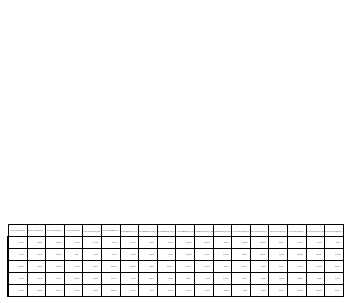

In [40]:
import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import table

ax = plt.subplot(frame_on=False) # no visible frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis

table(ax, stacked_dataset.head())  # where df is your data frame

# plt.savefig('mytable.png')

In [29]:
(r2_score(test_label, y_pred_1) + r2_score(test_label, y_pred_2) + r2_score(test_label, y_pred_3))/3

0.47229471549634033

In [46]:
model = Sequential()
model.add(Input(shape=(18,)))
model.add(Dense(15, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])

In [48]:
from keras_visualizer import visualizer
visualizer(model, format='png',view=True)

In [42]:
!pip install keras-visualizer